### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### Read the data

In [2]:
df = pd.read_excel('Tourism.xlsx', engine='openpyxl', sheet_name='Tourism')

In [3]:
df.shape

(4888, 20)

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
# check label distribution
print(df['ProdTaken'].value_counts(dropna=False))
print(df['ProdTaken'].value_counts(dropna=False, normalize=True)*100)

0    3968
1     920
Name: ProdTaken, dtype: int64
0    81.178396
1    18.821604
Name: ProdTaken, dtype: float64


### Exploratory data analysis

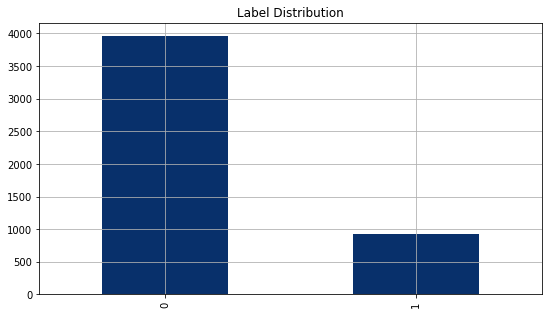

In [6]:
label_counts = df['ProdTaken'].value_counts().sort_values()[::-1]
label_counts.plot(
    kind='bar',
    figsize=(9,5),
    title='Label Distribution',
    grid=True,
    colormap='Blues_r')

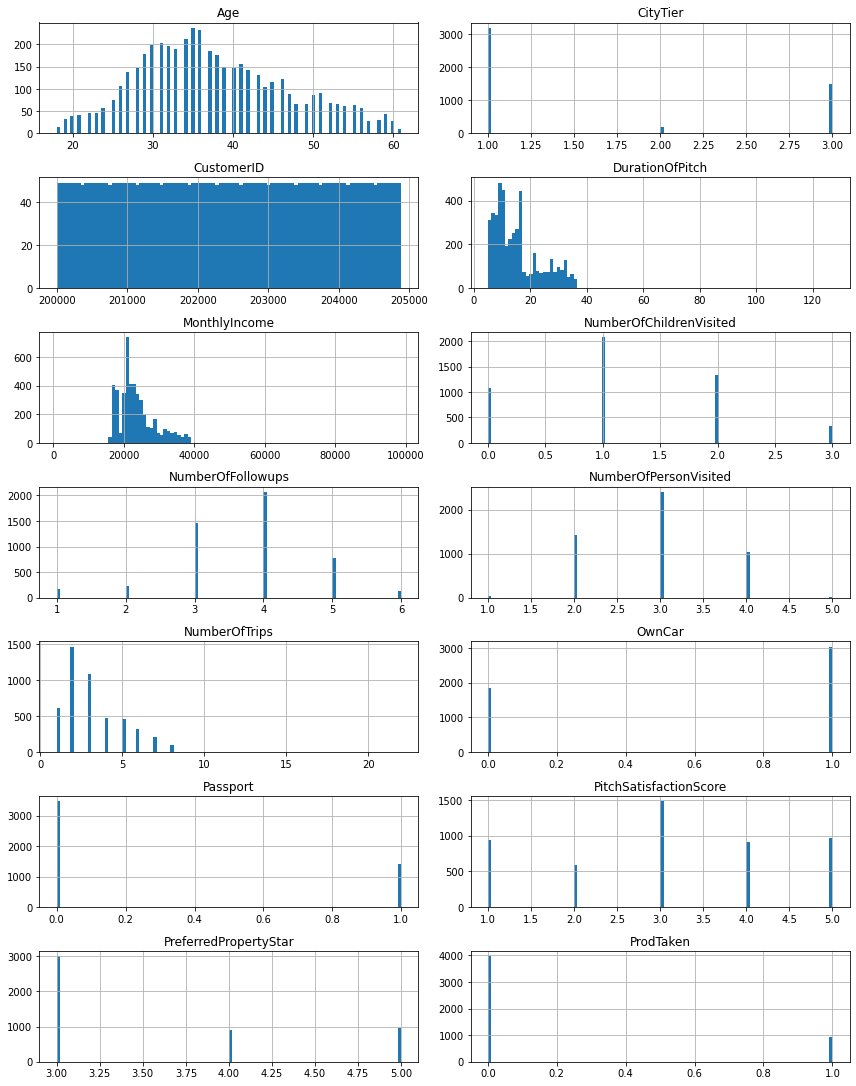

In [7]:
# plot histograms of all columns
columns = list(df.columns)
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
plt.tight_layout()

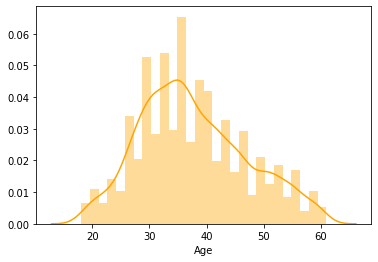

In [8]:
sns.distplot(df['Age'].dropna(),color='orange', kde=True)
plt.show()

**Insights**
- Most of the customers are between 25-45 years of age

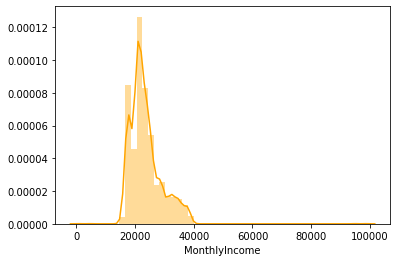

In [9]:
sns.distplot(df['MonthlyIncome'].dropna() ,color='orange', kde=True)
plt.show()

**Insights**
- Most of the customers make between 20k-30k per month

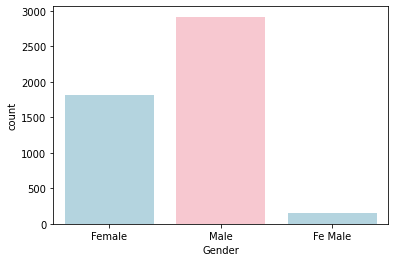

Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64


In [10]:
sns.countplot(df['Gender'], palette=['lightblue','pink'])
plt.show()

gender_dist = df['Gender'].value_counts(dropna=False, normalize=True)
print(gender_dist*100)

**Insights**
- Of all the customers who purchased the travel package, ~60% are men and 40% are women. (There is a data issue in the gender catregiry which will be handled in data preprocessing step)

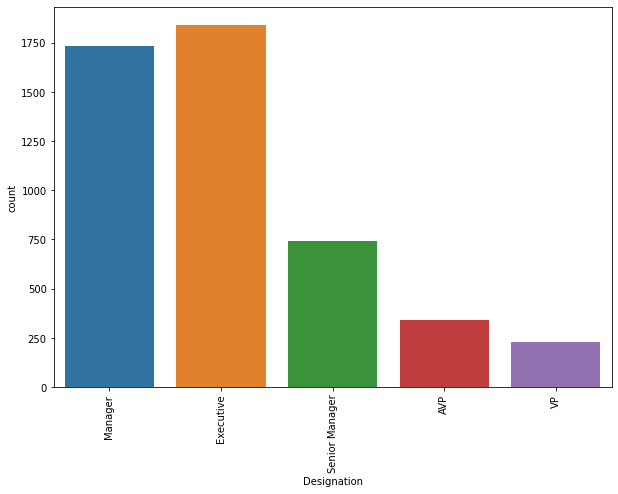

Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64


In [11]:
plt.figure(figsize=(10,7))                      
plt.xticks(rotation = 90)
sns.countplot(df['Designation'])
plt.show()

occupation = df['Designation'].value_counts(normalize=True)
print(occupation*100)

**Insights**
- Highest percentage of customers who purchased the travel package are Executives closely followed by Managers and least are AVP and VPs

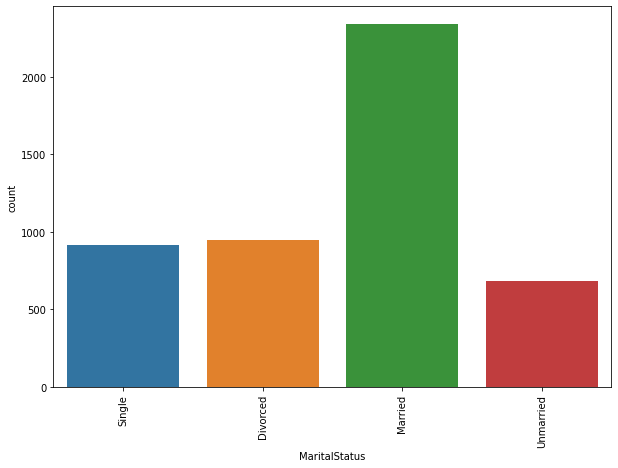

Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64

In [12]:
plt.figure(figsize=(10,7))                      
plt.xticks(rotation = 90)
sns.countplot(df['MaritalStatus'])
plt.show()

df['MaritalStatus'].value_counts(normalize=True) * 100

**Insights**
- Highest percentage of customers who purchased the travel package are Married

Insights:
- Highest number of customers are in their early to mid-30s
- Majority of the customers come from Tier 1 cities folllowed by Tier 3
- Majority of the customers who took the trip owned a car

### Bivariate Analysis

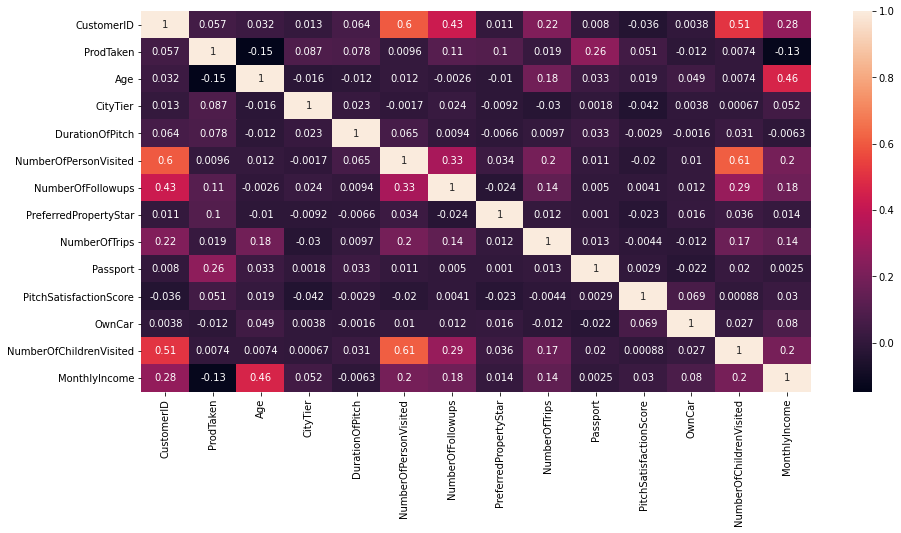

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Insights:
- MonthlyIncome and Age is positively correlated with correlation of ~0.5
- NumberOfPersonVisited and NumberOfChildrenVisited is highly correlated with correlation of 0.7. 

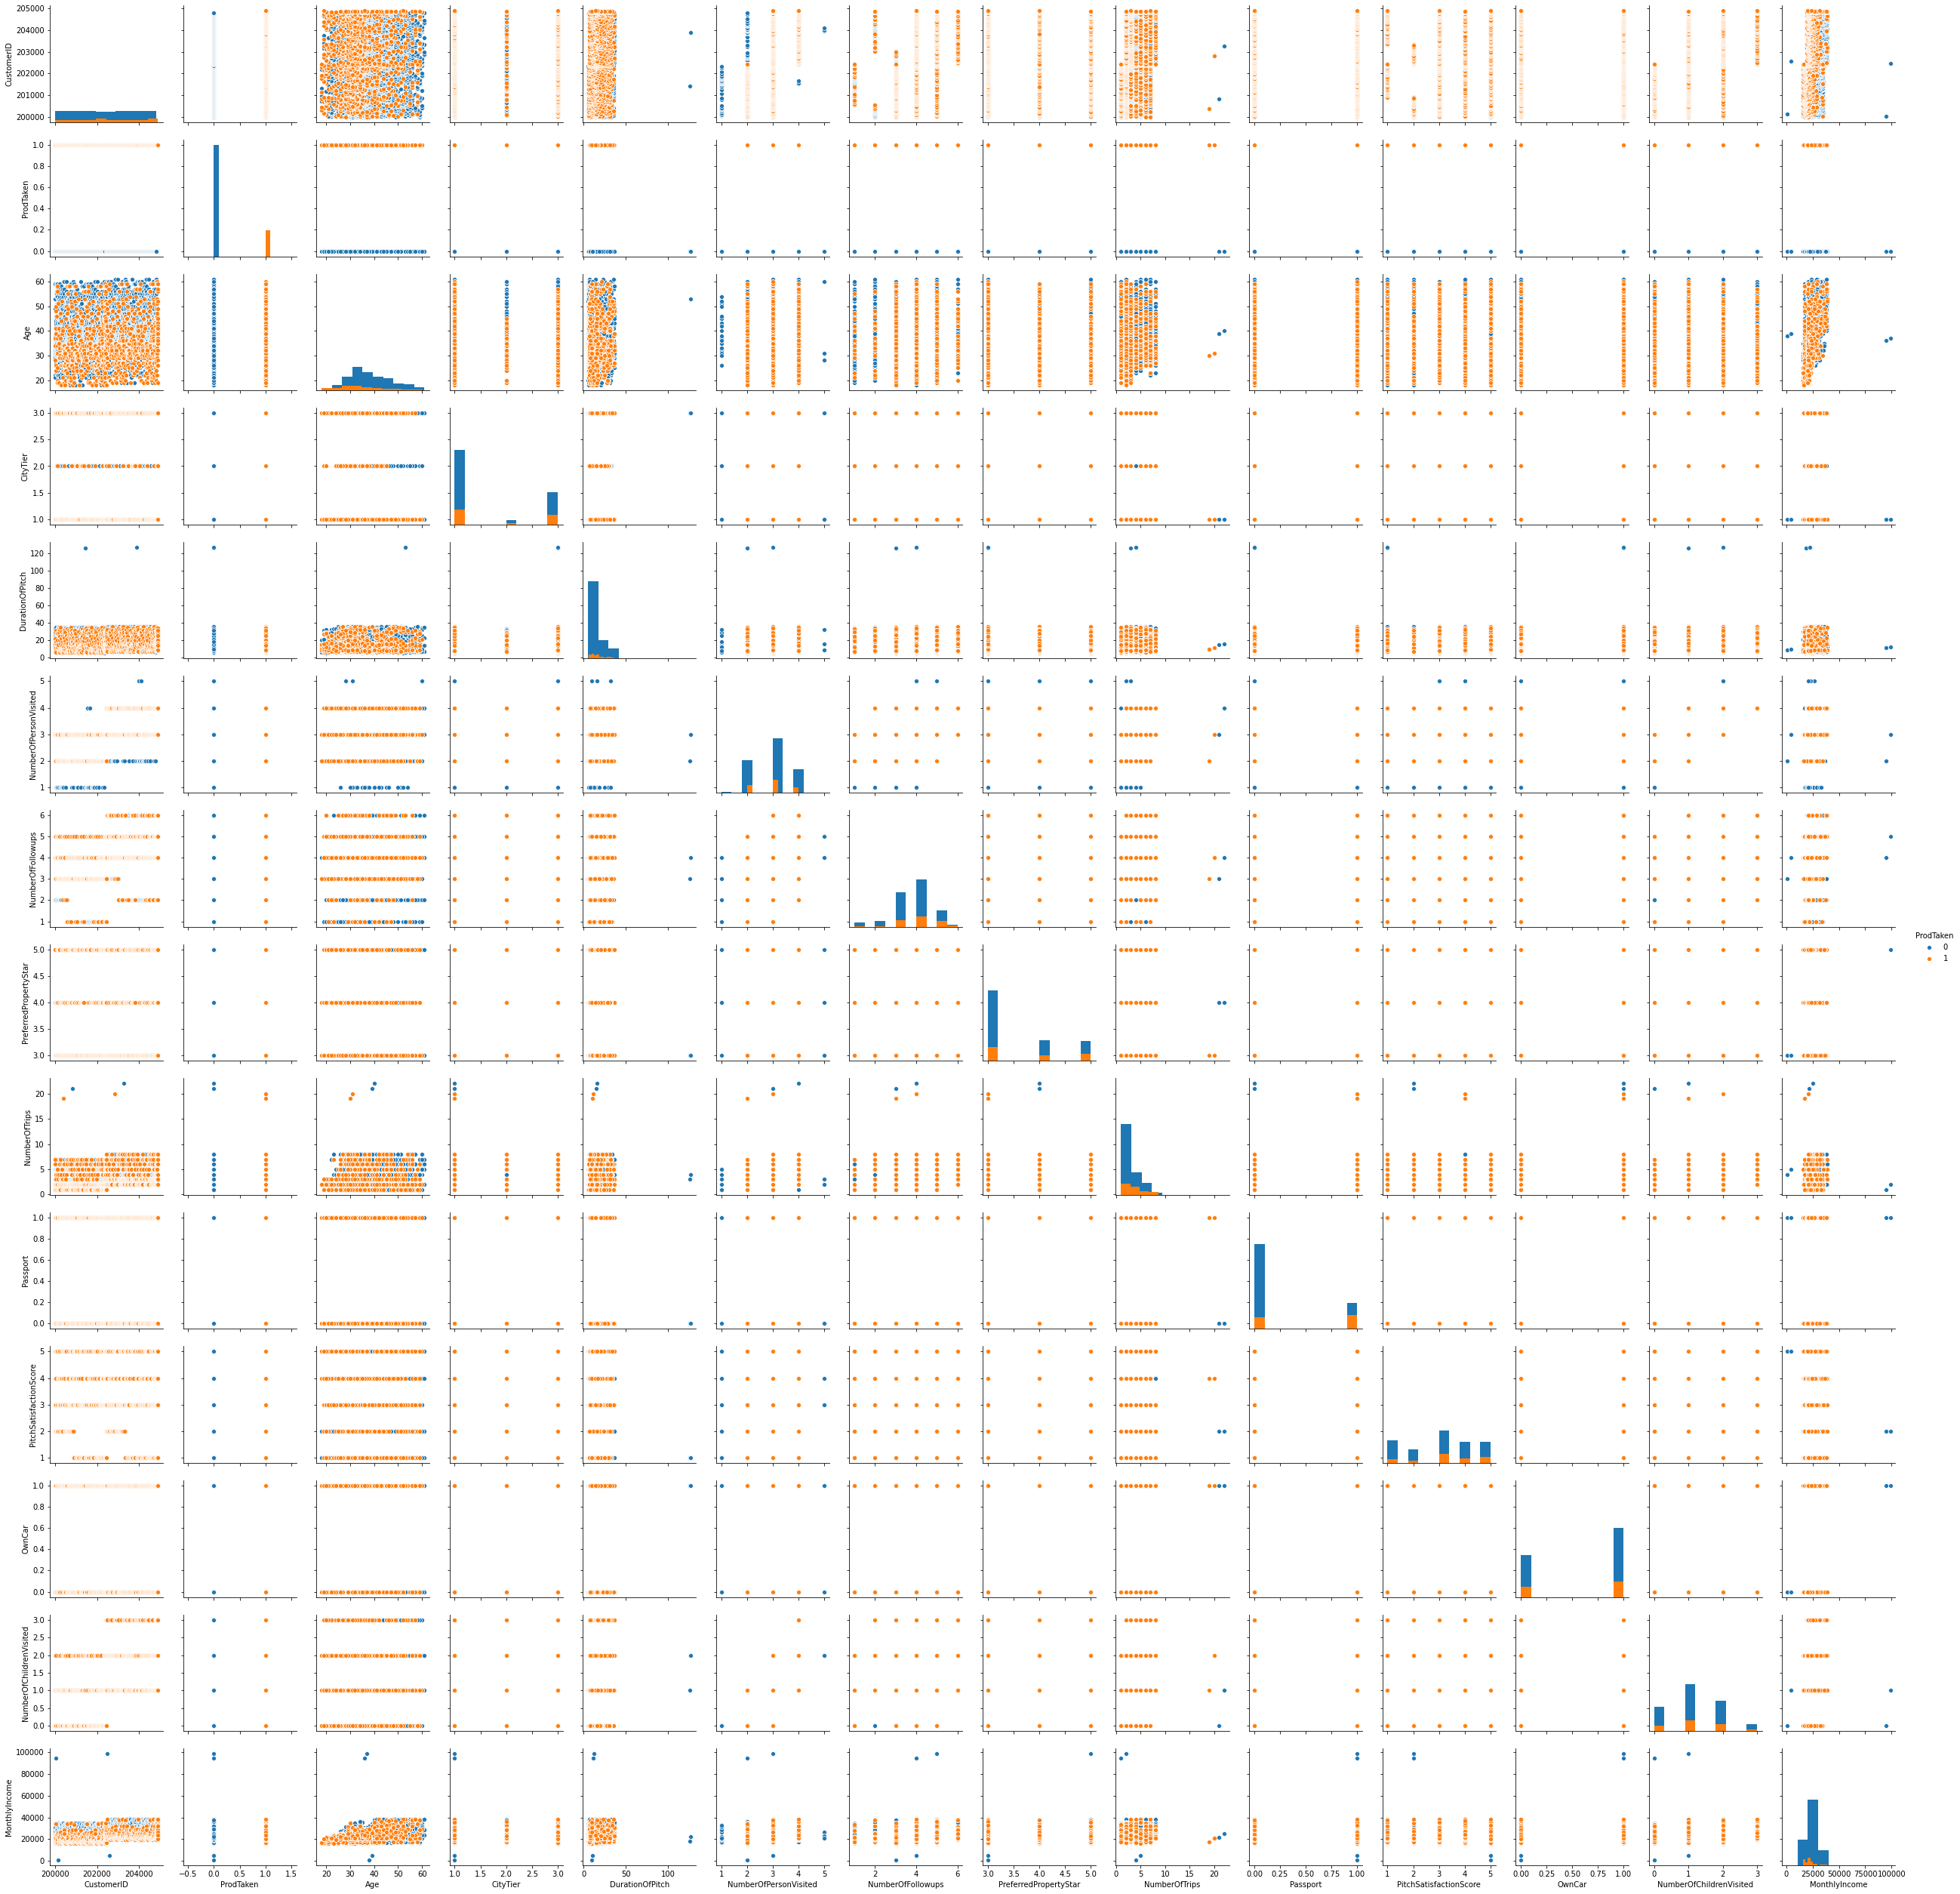

In [14]:
sns.pairplot(data=df,hue="ProdTaken",diag_kind='hist')
plt.show()

We can see varying distributions in variables for reveniw, we should investigate it further

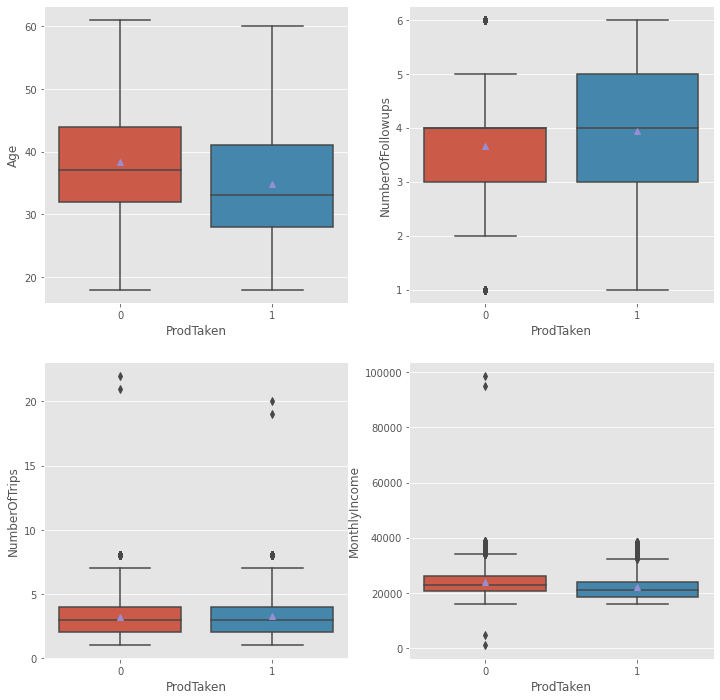

In [15]:
# Plotting the features using boxes
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.subplot(2,2,1)
sns.boxplot(x = 'ProdTaken', y = 'Age', data = df, showmeans=True)
plt.subplot(2,2,2)
sns.boxplot(x = 'ProdTaken', y = 'NumberOfFollowups', data = df, showmeans=True)
plt.subplot(2,2,3)
sns.boxplot(x = 'ProdTaken', y = 'NumberOfTrips', data = df, showmeans=True)
plt.subplot(2,2,4)
sns.boxplot(x = 'ProdTaken', y = 'MonthlyIncome', data = df, showmeans=True)

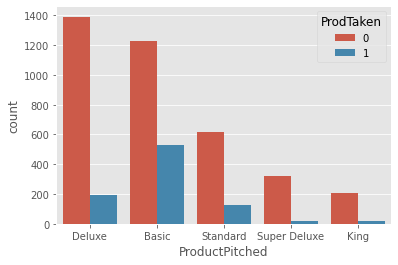

In [147]:
sns.countplot(df['ProductPitched'],hue=df['ProdTaken'])

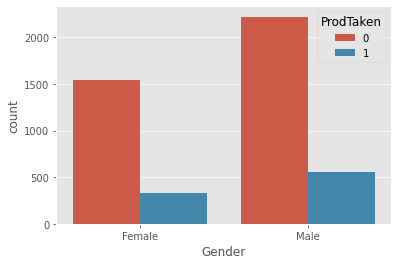

In [148]:
sns.countplot(df['Gender'],hue=df['ProdTaken'])

### Illustrate the insights based on EDA (Additional)

- Median Age of the customer who purchases the travel package is 33 while the age of customer who did not purchase the travel package is 37
- Age at 75th percentile of customers who took the travel package is around 41 (75% of the customers are under age of 44)
- The mean value for NumberOfFollowups based on customers who accepted travel package is around 4 while 75 percentile is 5
- The average monthly income of customers who did not purchase travel package is slighly higher than customers who did purchase travel package
- Number of male customers who purchased the travel package are more than number of female customers
- Customers with basic package are majority ones to purchase the travel package followed by deluxe and least being king.

### Data Pre-processing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
CustomerID                 4888 non-null int64
ProdTaken                  4888 non-null int64
Age                        4662 non-null float64
TypeofContact              4863 non-null object
CityTier                   4888 non-null int64
DurationOfPitch            4637 non-null float64
Occupation                 4888 non-null object
Gender                     4888 non-null object
NumberOfPersonVisited      4888 non-null int64
NumberOfFollowups          4843 non-null float64
ProductPitched             4888 non-null object
PreferredPropertyStar      4862 non-null float64
MaritalStatus              4888 non-null object
NumberOfTrips              4748 non-null float64
Passport                   4888 non-null int64
PitchSatisfactionScore     4888 non-null int64
OwnCar                     4888 non-null int64
NumberOfChildrenVisited    4822 non-null float64
Designation                488

In [17]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [18]:
df.dtypes.value_counts()

float64    7
int64      7
object     6
dtype: int64

In [19]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

### Missing value treatment

- MonthlyIncome

Stragegy: Drop the rows which does not have monthly income since it accounts for only 4.7% of the data and additionally it can be midleading to impute monthly income with mean or median due to the presence of extreme values

In [28]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1000.0, 98678.0)

In [29]:
df = df.dropna(subset=['MonthlyIncome'])

In [30]:
df.shape

(4655, 20)

- Age

In [31]:
### Age
df['Age'].describe()

count    4559.000000
mean       37.682606
std         9.332620
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [32]:
df['Age'].isnull().sum()

96

There are 96 missing values in Age column. Impute Age column with median rather than mean due to presence of extreme values

In [33]:
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df['Age'].isnull().sum())

0


- TypeofContact

In [34]:
### TypeofContact 
df['TypeofContact'].value_counts(dropna=False)

Self Enquiry       3306
Company Invited    1349
Name: TypeofContact, dtype: int64

In [35]:
df['TypeofContact'].dtype

dtype('O')

Impute TypeofContact column with other 

In [36]:
df['TypeofContact'].fillna('other', inplace=True)
print(df['TypeofContact'].value_counts(dropna=False))

Self Enquiry       3306
Company Invited    1349
Name: TypeofContact, dtype: int64


- DurationOfPitch

In [37]:
### DurationOfPitch
print(df['DurationOfPitch'].value_counts(dropna=False))
df['DurationOfPitch'].dtype

9.0      472
7.0      341
8.0      314
6.0      287
16.0     265
15.0     262
14.0     242
10.0     232
13.0     221
11.0     199
12.0     194
17.0     170
NaN      154
30.0      93
22.0      86
31.0      83
23.0      79
32.0      74
18.0      73
25.0      71
21.0      71
27.0      70
24.0      70
29.0      69
26.0      69
20.0      63
35.0      61
28.0      59
33.0      57
19.0      54
34.0      49
36.0      44
5.0        5
126.0      1
127.0      1
Name: DurationOfPitch, dtype: int64


dtype('float64')

In [38]:
df['DurationOfPitch'].describe()

count    4501.000000
mean       15.528549
std         8.530906
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

Impute DurationOfPitch column with median 

In [39]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['DurationOfPitch'].isnull().sum()

0

- NumberOfFollowups

In [40]:
### NumberOfFollowups
print(df['NumberOfFollowups'].value_counts(dropna=False))
df['NumberOfFollowups'].dtype

4.0    2012
3.0    1317
5.0     755
2.0     226
1.0     164
6.0     136
NaN      45
Name: NumberOfFollowups, dtype: int64


dtype('float64')

In [41]:
df['NumberOfFollowups'].describe()

count    4610.000000
mean        3.732321
std         1.006130
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

Impute this column with 0 since the null values here most likely indicate that the agent did not follow up with the customer

In [42]:
df['NumberOfFollowups'].fillna(0, inplace=True)
df['NumberOfFollowups'].isnull().sum()

0

- PreferredPropertyStar

In [44]:
### PreferredPropertyStar
print(df['PreferredPropertyStar'].value_counts(dropna=False))
df['PreferredPropertyStar'].dtype

3.0    2859
5.0     899
4.0     871
NaN      26
Name: PreferredPropertyStar, dtype: int64


dtype('float64')

In [45]:
df['PreferredPropertyStar'].describe()

count    4629.000000
mean        3.576582
std         0.795420
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PreferredPropertyStar, dtype: float64

Impute the column with median as it is discrete numeric column

In [46]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median(), inplace=True)
df['PreferredPropertyStar'].isnull().sum()

0

- NumberOfTrips

In [48]:
### NumberOfTrips
print(df['NumberOfTrips'].value_counts(dropna=False))
df['NumberOfTrips'].dtype

2.0     1365
3.0     1056
1.0      562
4.0      461
5.0      444
6.0      305
7.0      213
NaN      140
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64


dtype('float64')

In [49]:
df['NumberOfTrips'].describe()

count    4515.000000
mean        3.270653
std         1.854670
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64

In [54]:
df.loc[df['NumberOfTrips'].isnull()].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2469,202469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,202473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,202506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,202549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,202550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0


Impute the column with 0 as it most likely indicate customer did not take any trip in the past

In [55]:
df['NumberOfTrips'].fillna(0, inplace=True)
df['NumberOfTrips'].isnull().sum()

0

- NumberOfChildrenVisited

In [56]:
### NumberOfChildrenVisited
print(df['NumberOfChildrenVisited'].value_counts(dropna=False))
df['NumberOfChildrenVisited'].dtype

1.0    1986
2.0    1309
0.0     969
3.0     325
NaN      66
Name: NumberOfChildrenVisited, dtype: int64


dtype('float64')

Impute the column with 0 as it most likely indicate customer did not take any children

In [57]:
df['NumberOfChildrenVisited'].fillna(0, inplace=True)
df['NumberOfChildrenVisited'].isnull().sum()

0

#### verify there are no missing values

In [60]:
df.isnull().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

#### Drop customerID column as it does not explain the target

In [61]:
### Remove customer_id
df = df.drop('CustomerID', axis=1)

### Outlier Detection

In [62]:
### Using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ProdTaken                     0.0
Age                          13.0
CityTier                      2.0
DurationOfPitch              11.0
NumberOfPersonVisited         1.0
NumberOfFollowups             1.0
PreferredPropertyStar         1.0
NumberOfTrips                 2.0
Passport                      1.0
PitchSatisfactionScore        2.0
OwnCar                        1.0
NumberOfChildrenVisited       1.0
MonthlyIncome              5225.0
dtype: float64


Text(0.5, 1.0, 'Distribution of Monthly Income')

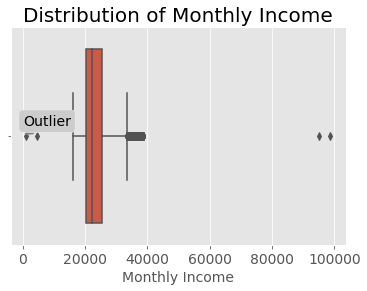

In [63]:
# box plot of the variable monthly income
ax = sns.boxplot(df.MonthlyIncome)

# notation indicating an outlier
ax.annotate('Outlier', xy=(105,0), xytext=(98,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Monthly Income', fontsize=14)
plt.title('Distribution of Monthly Income', fontsize=20)

Text(0.5, 1.0, 'Age')

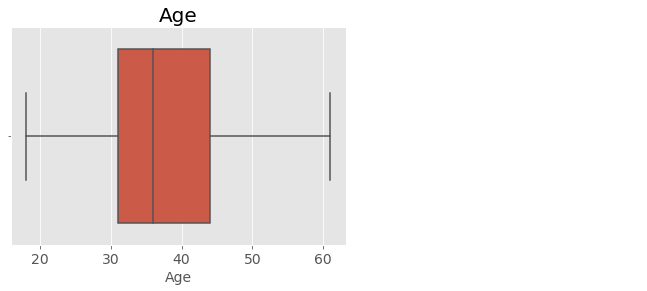

In [64]:
# box plot of the variable Age
ax = sns.boxplot(df.Age)

# notation indicating an outlier
ax.annotate('Outlier', xy=(105,0), xytext=(98,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Age', fontsize=20)

In [65]:
df['Age'].min(), df['Age'].max()

(18.0, 61.0)

In [66]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1000.0, 98678.0)

**Why not:**
- An outlier is an observation that appears to deviate from other observatins in the dataset. An outlier is considered bad when the outlying point is coded incorrectly therefore an outlier should only be deleted if the point is erroneuous. However in this case the points does not seem to be incorrectly created. Deleting outliers which has a valid meaning can lead to data loss and results in poor model performance hence we need to be cautious in handling outliers. 

For example consider the below scenarios:
- customer monthly income range is between 1000 and 98678. Here the observations closer to 100k are outliers but it does not seem to come at random.
- customer age range is between 18 and 61. Here the maximum age of customer is 61 which is totally valid. However if there were observations where customer age is more than 100 then it can be investigated as an erroneuous outlier.
- Additionally bagging and boosting methods are robust to outliers

Based on the above observations we do not remove the outlier from this data

### Feature Engineering (Categorical encoding)

#### Fix the Gender column issue

In [67]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [68]:
df['Gender'].value_counts()

Male      2781
Female    1874
Name: Gender, dtype: int64

### Handle categorical variables

In [78]:
for col in df.columns:
    if df[col].dtype == "O":
        print(df[col].value_counts(dropna=False),'\n')

Self Enquiry       3306
Company Invited    1349
Name: TypeofContact, dtype: int64 

Salaried          2263
Small Business    1970
Large Business     420
Free Lancer          2
Name: Occupation, dtype: int64 

Male      2781
Female    1874
Name: Gender, dtype: int64 

Basic           1755
Deluxe          1586
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64 

Married      2228
Divorced      902
Single        843
Unmarried     682
Name: MaritalStatus, dtype: int64 

Executive         1755
Manager           1586
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64 



In [79]:
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include=['object'])

In [80]:
df_cat_encoded = pd.get_dummies(df_cat)

In [81]:
df_cat_encoded

,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4884,1,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
4885,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4886,0,1,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [82]:
# concat the numeric and encoded cat columns
df_encoded = pd.concat([df_num, df_cat_encoded], axis=1)

In [83]:
df_encoded.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,0,36.0,1,8.0,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0


### Prepare data for Modeling

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df_encoded.drop('ProdTaken', axis=1)
y = df_encoded['ProdTaken']

In [88]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3258, 34) (1397, 34)


### Model building - Bagging

In [89]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#### Bagging classifier - before hyperparamter tuning

In [91]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [92]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9914057704112953
Accuracy on test set :  0.901932712956335
Recall on training set :  0.9574468085106383
Recall on test set :  0.6064981949458483
Precision on training set :  0.9965928449744463
Precision on test set :  0.8571428571428571


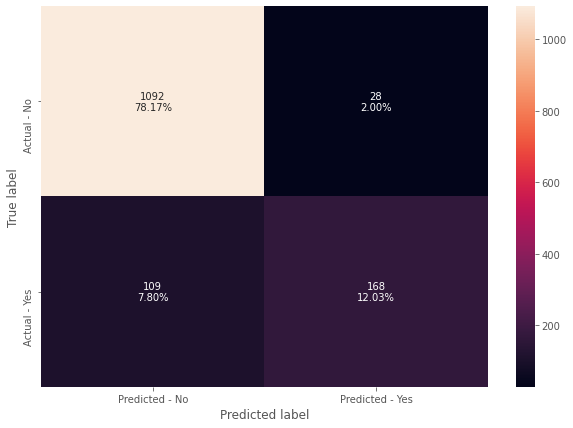

In [93]:
make_confusion_matrix(bagging_estimator,y_test)

#### Random Forest classifier - before hyperparamter tuning

In [94]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [95]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8976377952755905
Recall on training set :  1.0
Recall on test set :  0.5270758122743683
Precision on training set :  1.0
Precision on test set :  0.9240506329113924


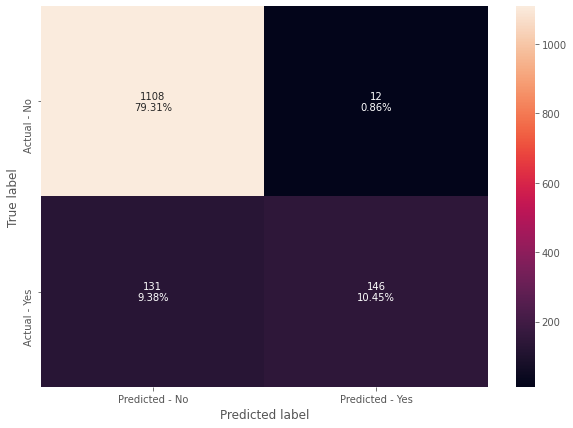

In [96]:
make_confusion_matrix(rf_estimator,y_test)

With default parameters:

- Both models - Bagging classifiers as well as random forest classifier are overfitting the train data.
- Both models are giving similar performance in terms of accuracy but Random forest classifier is giving better recall.

#### Model performance evaluation and improvement

In my opinion Precision is more important here because the objective is to predict which customer is more likely to purchase the long term travel package. In this case we want to identify the right customer who will purchase the product but we cannot have high false positives. 

The model performance can be further improved by careful hyperparameter tuning. In the below cells we will build the bagging and random forest classifier with hyperparameter tuning and compare the performance.

#### Bagging Classifier - With hyperparameter tuning

In [97]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters 
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [98]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9990791896869244
Accuracy on test set :  0.9098067287043665
Recall on training set :  0.9950900163666121
Recall on test set :  0.6101083032490975
Precision on training set :  1.0
Precision on test set :  0.9037433155080213


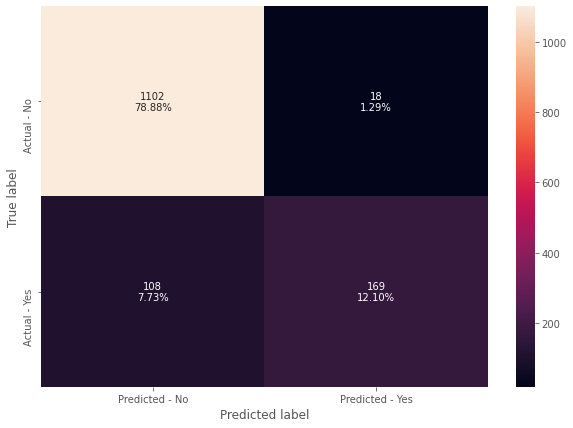

In [99]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Insights**
- We can see that train accuracy and recall for the bagging classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
- The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.
- The confusion matrix shows that the model is better at identifying non-defaulters as compared to defaulters.

#### Random Forest Classifier - With hyperparameter tuning

In [101]:
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters 
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [155]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9103744628606507
Accuracy on test set :  0.8503937007874016
Recall on training set :  0.5646481178396072
Recall on test set :  0.37184115523465705
Precision on training set :  0.9299191374663073
Precision on test set :  0.7463768115942029


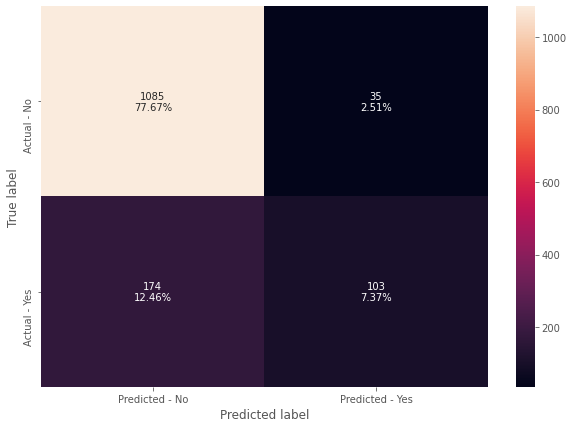

In [103]:
make_confusion_matrix(rf_estimator_tuned,y_test)

**Insights**
- We can see that random forest's performance has increased as compared to the random forest model with default parameters.
- Model is slightly overfitting the data but not as much as the tuned bagging classifier.
- The test recall is still very low. This means that the model is not good at identifying defaulters which is our primary aim here.

### Checking the feature importance (Random forest)

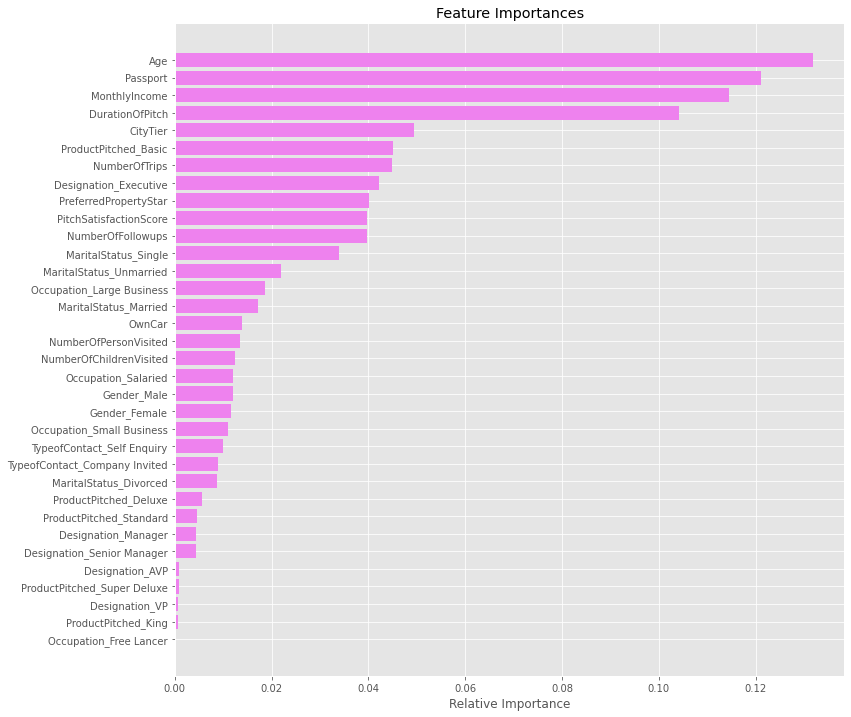

In [104]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### DecisionTree Classifier

In [150]:
# Choose the type of classifier. 
dt_tuned = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=1, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

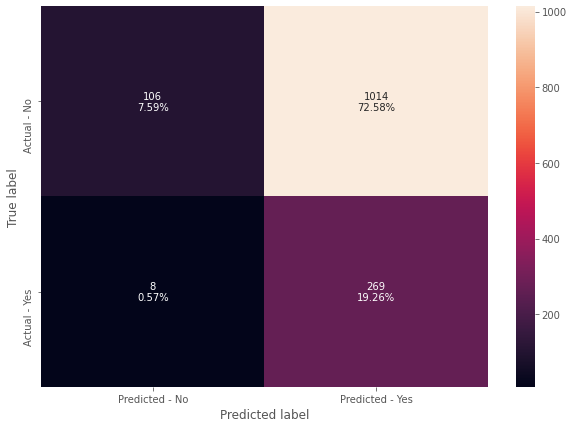

In [151]:
make_confusion_matrix(dt_tuned,y_test)

In [154]:
dt_tuned_score=get_metrics_score(dt_tuned)

Accuracy on training set :  0.2501534683855126
Accuracy on test set :  0.2684323550465283
Recall on training set :  0.9803600654664485
Recall on test set :  0.9711191335740073
Precision on training set :  0.1976897689768977
Precision on test set :  0.20966484801247076


#### Comparing Bagging and DT models

In [158]:
models = [bagging_estimator,bagging_estimator_tuned,rf_estimator,rf_estimator_tuned,dt_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [159]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                         'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier', 'Decision Tree Classifier with tuning'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.90,0.96,0.61,1.00,0.86
1,Tuned Bagging Classifier,1.00,0.91,1.00,0.61,1.00,0.90
2,Random Forest with deafult parameters,1.00,0.90,1.00,0.53,1.00,0.92
3,Tuned Random Forest Classifier,0.91,0.85,0.56,0.37,0.93,0.75
4,Decision Tree Classifier with tuning,0.25,0.27,0.98,0.97,0.20,0.21


The metric of interest is Recall as the objective is to predict the customers that are likely to purchase the long tyerm travel package. By optimizng the recall metric we will be able to target more customers who will purchase the travel plan.

- Based on the model implementation using different bagging algorithms we see that Bagging classifier and Random forest classifier with default parameters is overfitting the data. Bagging classifier with tuning also tends to overfit the training data
- Overall Decision Tree classifier with tuning is showing best best performance interms of recall. However the precision is very low which results in high false positives. This means of all the customer predicted to purchase the travel plan only 215 are predicted correctly.
- In order to balance the performance interms of precision and recall we should go with the tuned bagging classifier.

**Performance improvement**: The model performance can be further improved by additional hyper-parameter tuning and cross validation. 

### Boosting

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### Adaboost Classifier (without tuning)

In [116]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [117]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.848987108655617
Accuracy on test set :  0.8324982104509664
Recall on training set :  0.33878887070376434
Recall on test set :  0.30685920577617326
Precision on training set :  0.7016949152542373
Precision on test set :  0.6692913385826772


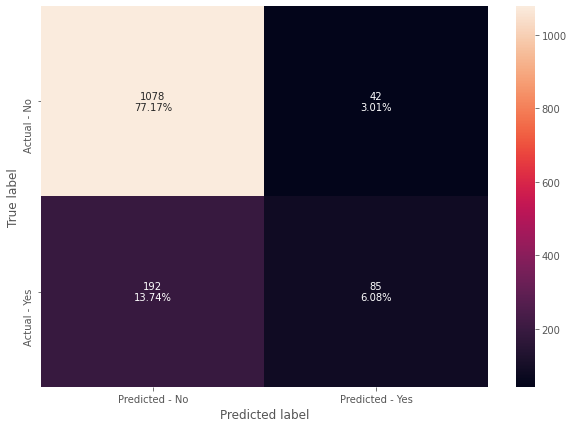

In [118]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier (without tuning)

In [120]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [121]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8934929404542664
Accuracy on test set :  0.8532569792412312
Recall on training set :  0.49427168576104746
Recall on test set :  0.36823104693140796
Precision on training set :  0.888235294117647
Precision on test set :  0.7727272727272727


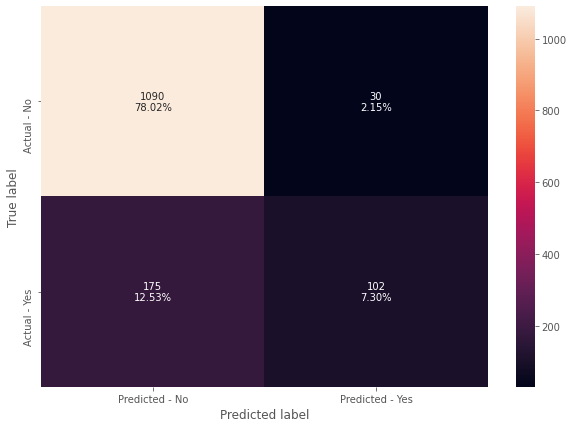

In [122]:
make_confusion_matrix(gbc,y_test)

### XGBoost (without tuning)

In [107]:
!pip install xgboost 

     |████████████████████████████████| 1.2MB 3.4MB/s eta 0:00:01


### XGBoost (without tuning)

In [113]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[20:25:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9996930632289748
Accuracy on test set :  0.9155332856120257
Recall on training set :  0.9983633387888707
Recall on test set :  0.6389891696750902
Precision on training set :  1.0
Precision on test set :  0.9076923076923077


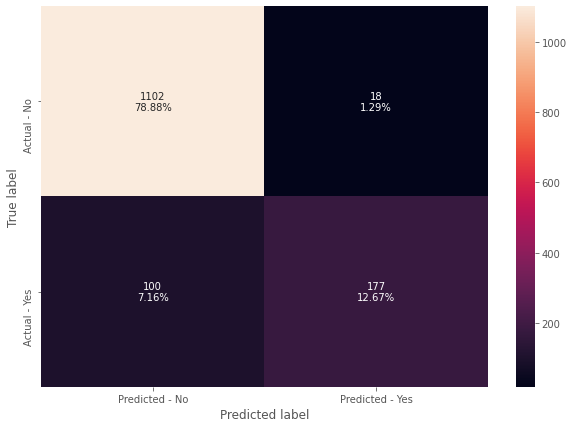

In [115]:
make_confusion_matrix(xgb,y_test)

**With default parameters:**

- AdaBoost classifier has better test accuracy among these 3 models.
- GB classifier has least test accuracy and test recall.

### AdaBoost Classifier (with tuning)

In [123]:
abc_tuned = AdaBoostClassifier(random_state=1)


parameters = {
    
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.6, n_estimators=100, random_state=1)

In [124]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9901780233271946
Accuracy on test set :  0.8718682891911238
Recall on training set :  0.9623567921440261
Recall on test set :  0.5956678700361011
Precision on training set :  0.9849246231155779
Precision on test set :  0.7112068965517241


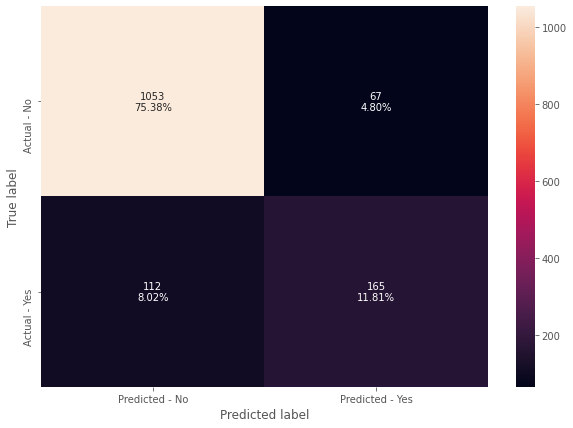

In [125]:
make_confusion_matrix(abc_tuned,y_test)

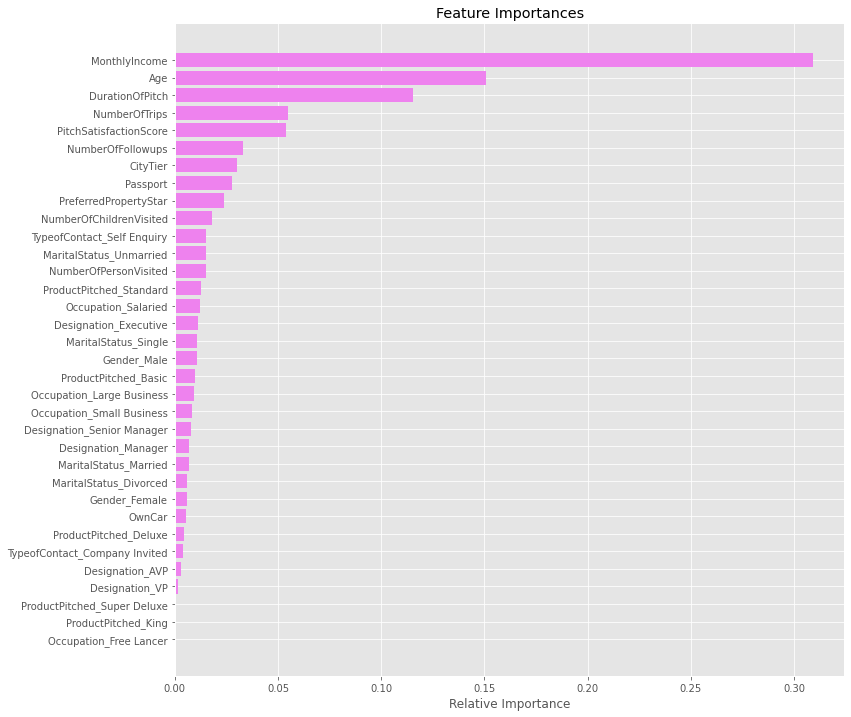

In [126]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier (with tuning)

In [129]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters 
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.8)

In [130]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9269490484960098
Accuracy on test set :  0.8768790264853257
Recall on training set :  0.6612111292962357
Recall on test set :  0.4729241877256318
Precision on training set :  0.9287356321839081
Precision on test set :  0.8343949044585988


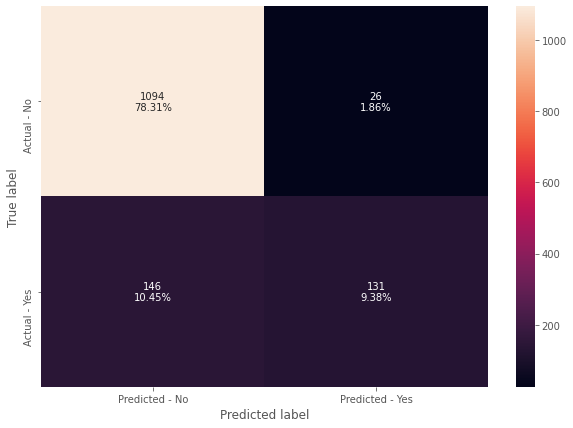

In [131]:
make_confusion_matrix(gbc_tuned,y_test)

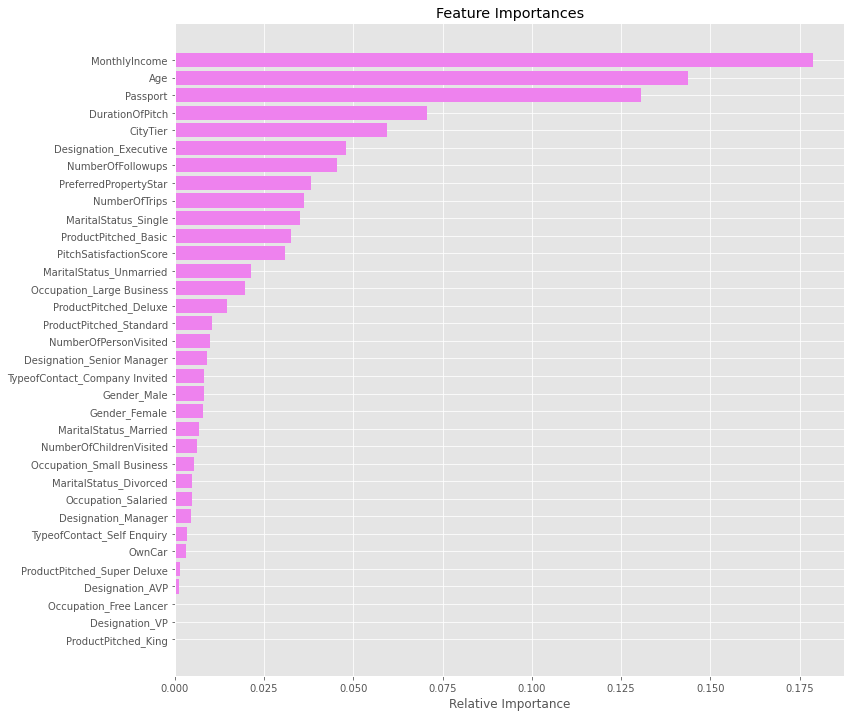

In [132]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost (with tuning)

In [109]:
%%time

xgb_tuned = XGBClassifier(random_state=1)

# Define grid of parameter
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.7,1],
    "learning_rate":[0.01,0.1,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.7,1],
    "colsample_bylevel":[0.7,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8585021485573971
Accuracy on test set :  0.8095919828203293
Recall on training set :  0.8821603927986906
Recall on test set :  0.7509025270758123
Precision on training set :  0.5808189655172413
Precision on test set :  0.5135802469135803


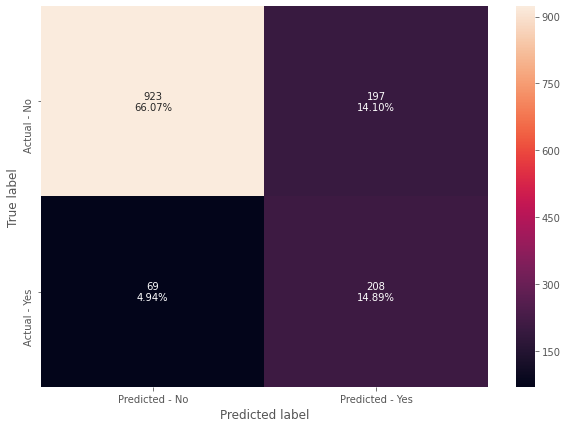

In [112]:
make_confusion_matrix(xgb_tuned,y_test)

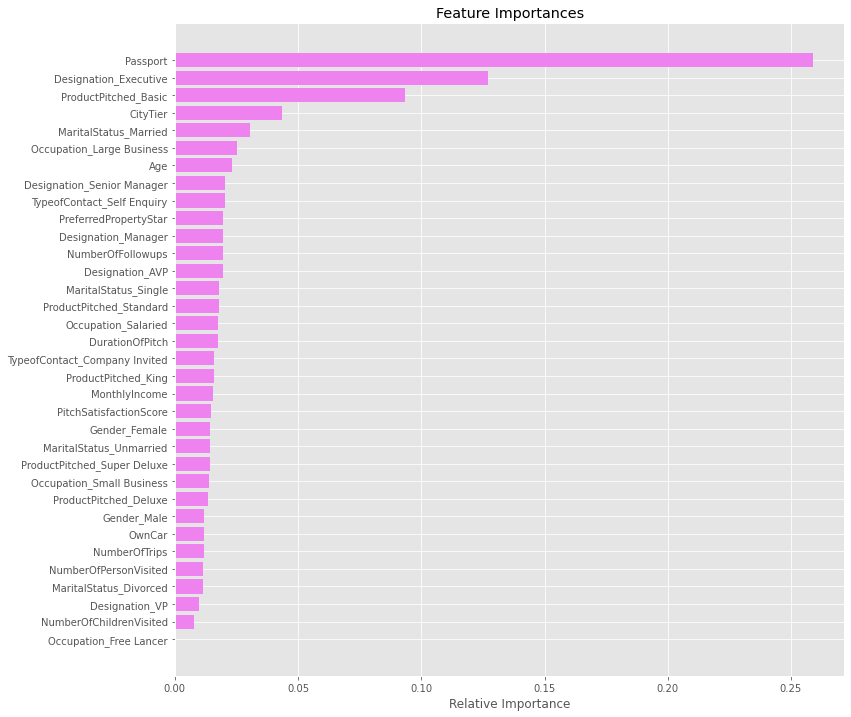

In [111]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Stacking Classifier

In [135]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

In [142]:
# create two layerd stacking model
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

clf_stacking = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

clf_stacking.fit(X_train, y_train).score(X_test, y_test)

0.889763779527559

In [145]:
stacking_score=get_metrics_score(clf_stacking)

Accuracy on training set :  0.9972375690607734
Accuracy on test set :  0.889763779527559
Recall on training set :  0.9852700490998363
Recall on test set :  0.5415162454873647
Precision on training set :  1.0
Precision on test set :  0.847457627118644


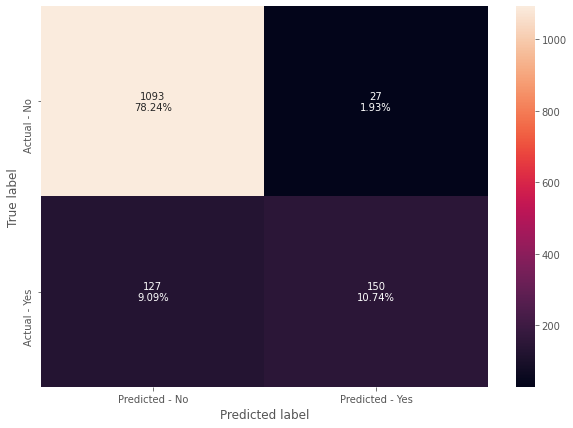

In [146]:
make_confusion_matrix(clf_stacking,y_test)

In [160]:
models = [abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned, clf_stacking]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [161]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters',
                                          'XGBoost Tuned','Stacking default'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.83,0.34,0.31,0.70,0.67
1,AdaBoost Tuned,0.99,0.87,0.96,0.60,0.98,0.71
2,Gradient Boosting with default parameters,0.89,0.85,0.49,0.37,0.89,0.77
3,Gradient Boosting Tuned,0.93,0.88,0.66,0.47,0.93,0.83
4,XGBoost with default parameters,1.00,0.92,1.00,0.64,1.00,0.91
5,XGBoost Tuned,0.86,0.81,0.88,0.75,0.58,0.51
6,Stacking default,1.00,0.89,0.99,0.54,1.00,0.85


- Based on the recall metric, we can see that XGboost with hyper-parameter tuning results in the best overal performance
- XGboost tuning results in recall of 75% which means the model correctly predicted 75% of all customers that purchased the travel plan. 
- We can also observe higher overfitting in case of Adaboost tuned, GBC tuned and stacking classifier.

In [165]:
pd.crosstab(df['Age']<45, df['Designation'])

Designation,AVP,Executive,Manager,Senior Manager,VP
Age,,,,,
False,233,161,291,235,153
True,109,1594,1295,507,77


In [167]:
pd.crosstab(df['MaritalStatus'], df['ProdTaken'])

ProdTaken,0,1
MaritalStatus,,
Divorced,783,119
Married,1912,316
Single,556,287
Unmarried,516,166


In [169]:
pd.crosstab(df['CityTier'], df['ProdTaken'])

ProdTaken,0,1
CityTier,,
1,2530,495
2,146,46
3,1091,347


In [186]:
pd.crosstab(df['DurationOfPitch']>20, df['ProdTaken'], normalize='index')

ProdTaken,0,1
DurationOfPitch,,
False,0.824690,0.175310
True,0.759711,0.240289


In [189]:
pd.crosstab(df['Age'], df['ProdTaken'])

ProdTaken,0,1
Age,,
18.0,6,8
19.0,11,21
20.0,13,25
21.0,18,23
22.0,31,15
23.0,33,13
24.0,33,18
25.0,52,19
26.0,61,37


In [168]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Actionable insights and Recommendation

- If a customer has a passport there's a very high chance that customer will purchase the travel package. Therefore it is recommended to target customers who already have a passport. 
- If the customer's designation is executive level and age under 45 are more likely to purchase the travel package. Hence it is recommended to target executive and manager level customers whose age is undder 45. 
- It is observed that customers whose status is married are more likely to purchase the travel package.
- We see that hughest number of customers who purchased the travel package come from Tier 1 and Tier 3. Thus the marketing team need to focus more on customers from these two tiers to boost revenue.
- Based on the data the sales team need to spend more on average more than 20 minutes duration to pitch the customer as higher data suggests hugher the Duration of pitch higher is the conversion.
- Target customer age group between 20-40 as they are more likely to purchase the travel package than different age groups.
- Employ the predictive model (xgboost tuned) to predict potential customers (customers who purchase travel package), offer limited time coupons/discounts on a real time basis and target customer from  tier 1 and tier 3 cities with existing passport.


#### Conclusion

- We analyzed the "Travel Package Purchase Prediction" using different techniques using bagging and boosting classifiers to build a predictive model.
- The model built can be ised to predict if a customer is going to purchase the long term travel package
- We visualized the relationships netween different features to get bette understanding of the data and came up with useful insights.
- We compared differet models and their confusion matrix to get a better understanding of the model anf its feature importances. 
- We saw that there is no need to deal with outliers in the data as bagging and boosting models are robust to outliers 
- We established the importance of hyper-parameter tuning to reduce overfitting